# Assortment Data Quality Analysis #
This notebook presents a comprehensive analysis of product data discrepancies between a Product Information Management (PIM) system and a Catalog tool for a leading global e-commerce platform. The goal of this project is to identify and resolve inconsistencies in product data, ensuring high-quality and consistent information across both backend (PIM) and user-facing (Catalog) systems.

Discrepancies between the two systems can arise due to various reasons, such as overrides by Local Teams in the Catalog or misalignments caused by subsequent updates in the PIM. These inconsistencies can negatively impact user experience, operational efficiency, and overall data integrity. This analysis aims to quantify and categorize the discrepancies in order to propose a resolution strategy to address the identified issues, suggest preventive measures to avoid similar issues in the future and outline an operational plan to implement the resolution efficiently.

## Data Anonymization
The original dataset contained proprietary and sensitive information related to a leading global e-commerce platform. To ensure the confidentiality and privacy of sensitive information, the dataset provided for this analysis was anonymized using hashing techniques. 

Identifiable information, such as partner names, product IDs, and other unique identifiers, was replaced with hashed values using a secure hashing algorithm.

The anonymization process was designed to avoid altering the relationships between data points, ensuring the analysis results remain valid.

### Libraries and dataset import
I use some key Python libraries:  
- **Pandas** and **NumPy** for data manipulation and calculations.  
- **Matplotlib** and **Seaborn** for creating visualizations.  
- **SciKit-Learn** to compute **Jaccard Similarity**, to compare similarities in product names.  
- **FuzzyWuzzy** for fuzzy string matching, to spot text discrepancies like mismatched product titles. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz

In [3]:
df = pd.read_csv('anonymized_dataset.csv')

## Data cleaning
Before diving into the analysis, I started by exploring the dataset to understand its structure and identify any issues. To ensure the data was clean and ready for analysis, I performed the following steps:  
- **Removed duplicates**: I eliminated redundant rows to avoid skewing the results.  
- **Handled null values**: I addressed missing data to maintain the dataset's integrity.  
- **Renamed columns**: I standardized column names for clarity and consistency.  

In [7]:
#Show 5 first rows of the dataset
df.head()

,Partner Name,PIM PRODUCT CODE,Catalog PRODUCT CODE,Barcodes/EAN,PIM Product Name,PIM Image,Catalog Product Name,Catalog Image,GMV,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,Partner A,f2699911a7d9e406a6cc0e9a3667be599e6db75e654d28...,591431563cd31998b49d2975b9ef3079aacf545f6dc04a...,67e0bdb7b6c549d4fa834d0f6848ce6a3a12e07de9cea9...,Product 04714d,https://example.com/image_8a1c42816d5dfebb035f...,Product 04714d,https://example.com/image_8a1c42816d5dfebb035f...,"€2,580.28",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#REF!
1,Partner A,22a4f1e912eb85c45139ede7cc39cfebb7dfd8268a0cd8...,68427b93007b98afa14a846f3d61c7baf49b8a2109b8f8...,9520e2f032a8297c8655670d4c7d36fec098b992e64842...,Product 410955,https://example.com/image_b9cd4aeba4c0ad6f572e...,Product 0f420d,https://example.com/image_b9cd4aeba4c0ad6f572e...,€339.97,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Partner A,005ea17847ff545137225f41e75d0bc95584afa48553fd...,c3e7baef68d03cae950a66c62252164e5d392fe8fad6e1...,8eb24a6640c4f06227f76d5e04a38dbe51f37fd31f8dfb...,Product 182459,https://example.com/image_454ddcb818e468cc918c...,Product 8b7e14,https://example.com/image_454ddcb818e468cc918c...,€585.54,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Partner A,1000136121cba7779e3d743a0d149ffea7d08a05c4e446...,5e385628f5c24e6edab55fcb6d0115e3d9eda88ac2bd73...,e3e2709ee4f926635d0af6013a5a386ce8274343d5803d...,Product 2fd5d7,https://example.com/image_a4e0abd80597251baedf...,Product a372cc,https://example.com/image_a4e0abd80597251baedf...,"€4,329.74",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Partner A,69dec83b05d2a12bf8dee43c64c547a41cbff755431e19...,d2bb7f3a7aff27bde86d5da4834aaa584af3f1e8f89334...,a2c822ad6c4ba24b5f35d13da61a9691248faf454dcd44...,Product f9a213,https://example.com/image_64b4b97185c5d5686e7d...,Product d9debc,https://example.com/image_64b4b97185c5d5686e7d...,"€10,220.93",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Show basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6243 entries, 0 to 6242
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Partner Name          6243 non-null   object 
 1   PIM PRODUCT CODE      6243 non-null   object 
 2   Catalog PRODUCT CODE  6243 non-null   object 
 3   Barcodes/EAN          6243 non-null   object 
 4   PIM Product Name      6243 non-null   object 
 5   PIM Image             6243 non-null   object 
 6   Catalog Product Name  6243 non-null   object 
 7   Catalog Image         6243 non-null   object 
 8   GMV                   6243 non-null   object 
 9   Unnamed: 9            0 non-null      float64
 10  Unnamed: 10           0 non-null      float64
 11  Unnamed: 11           0 non-null      float64
 12  Unnamed: 12           0 non-null      float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           0 non-null      float64
 15  Unnamed: 15          

In [11]:
#Show null values in each column
df.isnull().sum()

Partner Name               0
PIM PRODUCT CODE           0
Catalog PRODUCT CODE       0
Barcodes/EAN               0
PIM Product Name           0
PIM Image                  0
Catalog Product Name       0
Catalog Image              0
GMV                        0
Unnamed: 9              6243
Unnamed: 10             6243
Unnamed: 11             6243
Unnamed: 12             6243
Unnamed: 13             6243
Unnamed: 14             6243
Unnamed: 15             6243
Unnamed: 16             6243
Unnamed: 17             6243
Unnamed: 18             6243
Unnamed: 19             6243
Unnamed: 20             6243
Unnamed: 21             6243
Unnamed: 22             6243
Unnamed: 23             6243
Unnamed: 24             6243
Unnamed: 25             6243
Unnamed: 26             6243
Unnamed: 27             6243
Unnamed: 28             6243
Unnamed: 29             6243
Unnamed: 30             6243
Unnamed: 31             6243
Unnamed: 32             6243
Unnamed: 33             6243
Unnamed: 34   

In [35]:
#Drop null values
df = df.dropna(axis=1, how='all')

In [37]:
#Check and drop value from one column
df['Unnamed: 49'].dropna()

0    #REF!
Name: Unnamed: 49, dtype: object

In [39]:
#Drop irrelevant column
df = df.drop(columns=['Unnamed: 49'], errors='ignore')

In [41]:
#Eliminate € symbol from GMV column for computational purposes, change type and rename column
df['GMV'] = df['GMV'].replace('[€,]', '', regex=True).astype(float)
df = df.rename(columns={'GMV': 'GMV (€)'})

In [43]:
#Check for duplicate values
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Partner Name, PIM PRODUCT CODE, Catalog PRODUCT CODE, Barcodes/EAN, PIM Product Name, PIM Image, Catalog Product Name, Catalog Image, GMV (€)]
Index: []


## Data Exploration
In this section, I explored the dataset to identify discrepancies between the PIM and Catalog systems. Key steps included:
- Checking the number of unique partners, products, and barcodes.
- Identifying discrepancies in product names and images between PIM and Catalog data.
- Analyzing discrepancies by partner to pinpoint inconsistencies.
- Calculating GMV share for each partner to understand their contribution to overall sales.

In [92]:
#Check number and name of Partner column
print(df['Partner Name'].nunique())
print(df['Partner Name'].unique())

2
['Partner A' 'Partner B']


In [93]:
# Count the total number of products
total_entries = df.shape[0]
print(f"Total number of entries: {total_entries}")

Total number of entries: 6243


In [51]:
# Check number of unique PIM product codes and barcodes
unique_pim_codes = df['PIM PRODUCT CODE'].nunique()
print(unique_pim_codes)
unique_barcodes = df['Barcodes/EAN'].nunique()
print(unique_barcodes)

4391
4391


In [53]:
#Check total number of discrepancies
discrepancies = df[
    (df['PIM Product Name'] != df['Catalog Product Name']) |
    (df['PIM Image'] != df['Catalog Image'])
]
print(discrepancies.count())

Partner Name            3034
PIM PRODUCT CODE        3034
Catalog PRODUCT CODE    3034
Barcodes/EAN            3034
PIM Product Name        3034
PIM Image               3034
Catalog Product Name    3034
Catalog Image           3034
GMV (€)                 3034
dtype: int64


In [55]:
#Check number of discrepancies in Product Names and Images. In this calculation, products with title discrepancies can also have image discrepancies
#and products with image discrepancies can have title discrepancies
title_discrepancies = df[df['PIM Product Name'] != df['Catalog Product Name']]
image_discrepancies = df[df['PIM Image'] != df['Catalog Image']]
print(f"\nDiscrepancies in Product Names: {len(title_discrepancies)}")
print(f"\nDiscrepancies in Images: {len(image_discrepancies)}")


Discrepancies in Product Names: 3016

Discrepancies in Images: 233


In [57]:
# Identify number of products with both image and name discrepancies
both_discrepancies = df[(df['PIM Product Name'] != df['Catalog Product Name']) &
                                (df['PIM Image'] != df['Catalog Image'])]
both_discrepancies.shape[0]

215

In [59]:
# Check discrepancies by partner
partner_discrepancies = discrepancies['Partner Name'].value_counts().reset_index()
partner_discrepancies.columns = ['Partner Name', 'Discrepancies']
print(partner_discrepancies)

  Partner Name  Discrepancies
0    Partner A           1600
1    Partner B           1434


In [61]:
# Identify products with the correct title but the wrong image
overrides_with_wrong_image = df[(df['PIM Product Name'] == df['Catalog Product Name']) & 
                                        (df['PIM Image'] != df['Catalog Image'])]

print(f"Number of MPCs with overrides and the wrong image: {overrides_with_wrong_image.shape[0]}")

Number of MPCs with overrides and the wrong image: 18


In [63]:
# Identify products with the correct image but the wrong title
overrides_with_wrong_title = df[(df['PIM Product Name'] != df['Catalog Product Name']) & 
                                        (df['PIM Image'] == df['Catalog Image'])]

print(f"Number of MPCs with overrides and the wrong title: {overrides_with_wrong_title.shape[0]}")

Number of MPCs with overrides and the wrong title: 2801


## Product Name Similarities 
To quantify discrepancies between product names in the PIM and Catalog systems, I initially used **Jaccard Similarity**, a method commonly employed by the team. This approach measures the similarity between two sets of words by comparing their intersection and union. However, I found the results to be inconsistent, as Jaccard Similarity treats words as discrete units and doesn't account for partial matches or word order, which are critical for product name comparisons.

To address these limitations, I implemented the **FuzzyWuzzy** method, which uses the **Levenshtein distance** to calculate similarity based on character-level differences. This approach is better suited for product name comparisons because:
- It handles partial matches and typos effectively.
- It considers word order and small variations, making it more robust for real-world text data.
- It provides a more intuitive similarity score (0-100), which is easier to interpret and threshold.

Using FuzzyWuzzy, I categorized products into three groups based on similarity thresholds:
- **Same or Similar (≥80%)**: Nearly identical or very similar names.
- **Similar (60% - 80%)**: Names with noticeable but acceptable differences.
- **Totally Different (<60%)**: Names with significant discrepancies.

This method provided more reliable and actionable insights, enabling a clearer understanding of product name discrepancies.

In [101]:
# Function to calculate Jaccard similarity
def jaccard_similarity(row):
    pim_name = set(row['PIM Product Name'].split())
    catalog_name = set(row['Catalog Product Name'].split())
    intersection = pim_name.intersection(catalog_name)
    union = pim_name.union(catalog_name)
    similarity = float(len(intersection)) / len(union)
    return similarity

# Apply the function and filter based on a similarity threshold
df['Jaccard Similarity'] = df.apply(jaccard_similarity, axis=1)
similar_products = df[df['Jaccard Similarity'] > 0.3]

In [69]:
# Check the top 10 and bottom 10 similarities
top_10_similarities = df.nlargest(10, 'Jaccard Similarity')[['PIM Product Name', 'Catalog Product Name', 'Jaccard Similarity']]
bottom_10_similarities = df.nsmallest(10, 'Jaccard Similarity')[['PIM Product Name', 'Catalog Product Name', 'Jaccard Similarity']]

print("Top 10 Similarities:")
print(top_10_similarities)

print("\nBottom 10 Similarities:")
print(bottom_10_similarities)

Top 10 Similarities:
   PIM Product Name Catalog Product Name  Jaccard Similarity
0    Product 04714d       Product 04714d                 1.0
44   Product 8a87bd       Product 8a87bd                 1.0
55   Product 256b89       Product 256b89                 1.0
58   Product 5758e9       Product 5758e9                 1.0
64   Product c77021       Product c77021                 1.0
76   Product dbb241       Product dbb241                 1.0
78   Product 412ab2       Product 412ab2                 1.0
80   Product 82297d       Product 82297d                 1.0
81   Product 0b0a26       Product 0b0a26                 1.0
83   Product 3d468e       Product 3d468e                 1.0

Bottom 10 Similarities:
   PIM Product Name Catalog Product Name  Jaccard Similarity
1    Product 410955       Product 0f420d            0.333333
2    Product 182459       Product 8b7e14            0.333333
3    Product 2fd5d7       Product a372cc            0.333333
4    Product f9a213       Product d9deb

In [71]:
# Function to calculate fuzzy similarity
def fuzzy_similarity(row):
    return fuzz.ratio(row['PIM Product Name'], row['Catalog Product Name'])

df['Fuzzy Similarity'] = df.apply(fuzzy_similarity, axis=1)

# Define thresholds
same_or_similar_threshold = 80
totally_different_threshold = 60

# Categorize products based on thresholds
same_or_similar_products = df[df['Fuzzy Similarity'] >= same_or_similar_threshold]
similar_products = df[(df['Fuzzy Similarity'] >= totally_different_threshold) & (df['Fuzzy Similarity'] < same_or_similar_threshold)]
totally_different_products = df[df['Fuzzy Similarity'] < totally_different_threshold]

# Calculate percentages
same_or_similar_percentage = (same_or_similar_products.shape[0] / total_products) * 100
similar_percentage = (similar_products.shape[0] / total_products) * 100
totally_different_percentage = (totally_different_products.shape[0] / total_products) * 100

# Display the results
print(f"Percentage of same or similar products: {same_or_similar_percentage:.2f}%")
print(f"Percentage of similar products: {similar_percentage:.2f}%")
print(f"Percentage of totally different products: {totally_different_percentage:.2f}%")


Percentage of same or similar products: 51.85%
Percentage of similar products: 43.26%
Percentage of totally different products: 4.89%


## Visualizations

To better understand the data, I created several visualizations:
1. **GMV Share by Partner**: A bar chart showing each partner's contribution to total GMV, highlighting their relative importance.
2. **Product Similarity Analysis**: A bar chart categorizing products into "Same or Similar," "Similar," and "Different" based on FuzzyWuzzy similarity scores.
3. **Discrepancy Breakdown**: A stacked bar chart showing the distribution of correct entries and discrepancies (name, image, or both).
4. **Correlation Analysis**: A scatter plot with a trendline to explore the relationship between the number of discrepancies and total GMV per partner.

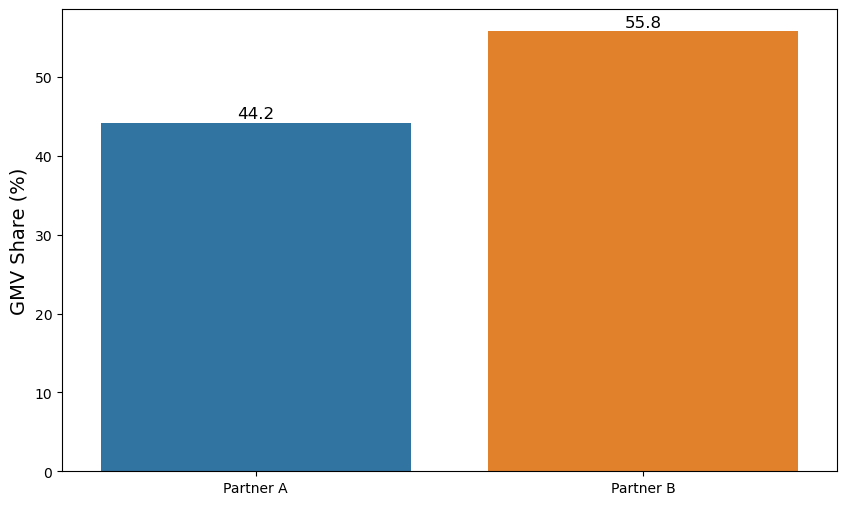

In [65]:
#Visualizing the GMV share for each partner
# Calculate total GMV
total_gmv = df['GMV (€)'].sum()
# Calculate GMV per partner
partner_gmv = df.groupby('Partner Name')['GMV (€)'].sum().reset_index()
# Calculate GMV share for each partner
partner_gmv['GMV Share'] = partner_gmv['GMV (€)'] / total_gmv * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Partner Name', y='GMV Share', data=partner_gmv, hue='Partner Name', dodge=False)
plt.ylabel('GMV Share (%)', fontsize=14)
plt.xlabel('')
for index, value in enumerate(partner_gmv['GMV Share']):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center', fontsize=12)
plt.savefig('gmv_share_per_partner.png', bbox_inches='tight', transparent=True)
plt.show()

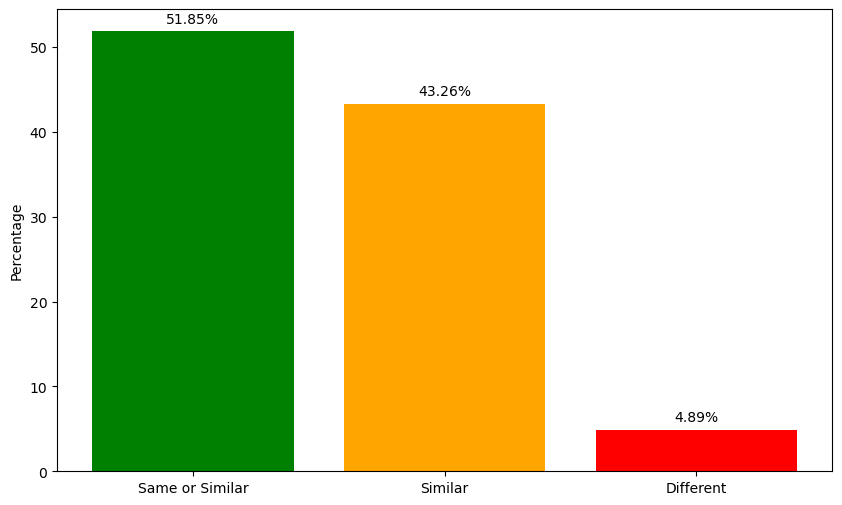

In [73]:
# Create a bar chart for FuzzyWuzzy
categories = ['Same or Similar', 'Similar', 'Different']
percentages = [same_or_similar_percentage, similar_percentage, totally_different_percentage]

plt.figure(figsize=(10, 6))
plt.bar(categories, percentages, color=['green', 'orange', 'red'])
plt.ylabel('Percentage')
for index, value in enumerate(percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')
plt.savefig('product_similarity_analysis.png', transparent=True)
plt.show()

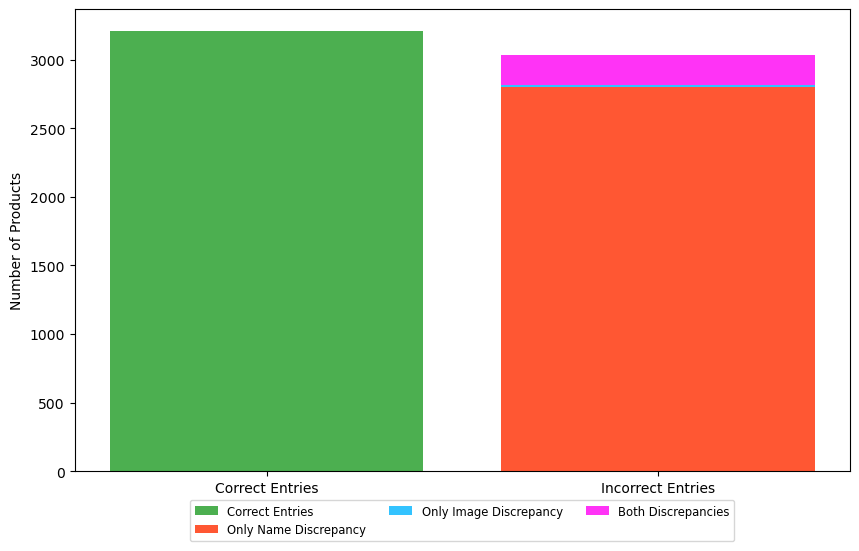

In [75]:
#Vizualize total correct and incorrect entries (discrepancies) by type
# Identify correct entries
totally_correct = df[
    (df['PIM PRODUCT CODE'] == df['PIM PRODUCT CODE']) &
    (df['Barcodes/EAN'] == df['Barcodes/EAN']) &
    (df['PIM Product Name'] == df['Catalog Product Name']) &
    (df['PIM Image'] == df['Catalog Image'])
]

# Identify incorrect entries
incorrect = df[~df.index.isin(totally_correct.index)]

# Identify type of discrepancies
name_discrepancies = incorrect[(incorrect['PIM Product Name'] != incorrect['Catalog Product Name']) &
                               (incorrect['PIM Image'] == incorrect['Catalog Image'])]
image_discrepancies = incorrect[(incorrect['PIM Product Name'] == incorrect['Catalog Product Name']) &
                                (incorrect['PIM Image'] != incorrect['Catalog Image'])]
both_discrepancies = incorrect[(incorrect['PIM Product Name'] != incorrect['Catalog Product Name']) &
                               (incorrect['PIM Image'] != incorrect['Catalog Image'])]

# Count the number of each type
num_totally_correct = totally_correct.shape[0]
num_name_discrepancies = name_discrepancies.shape[0]
num_image_discrepancies = image_discrepancies.shape[0]
num_both_discrepancies = both_discrepancies.shape[0]

# Prepare data for visualization
categories = ['Correct Entries', 'Incorrect Entries']
correct_count = [num_totally_correct, 0]
incorrect_count = [0, num_name_discrepancies + num_image_discrepancies + num_both_discrepancies]
sub_categories = ['Only Name Discrepancy', 'Only Image Discrepancy', 'Both Discrepancies']
sub_counts = [num_name_discrepancies, num_image_discrepancies, num_both_discrepancies]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categories, correct_count, color='#4CAF50', label='Correct Entries')
bottom_counts = [0, 0]
colors = ['#FF5733', '#33C3FF', '#FF33F6']
for i, count in enumerate(sub_counts):
    ax.bar(categories, [0, count], bottom=bottom_counts, label=sub_categories[i], color=colors[i])
    bottom_counts[1] += count
ax.set_ylabel('Number of Products')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize='small')
plt.savefig('product_discrepancies_stacked.png', transparent=True)
plt.show()

Correlation coefficient between number of discrepancies and total GMV: -1.00


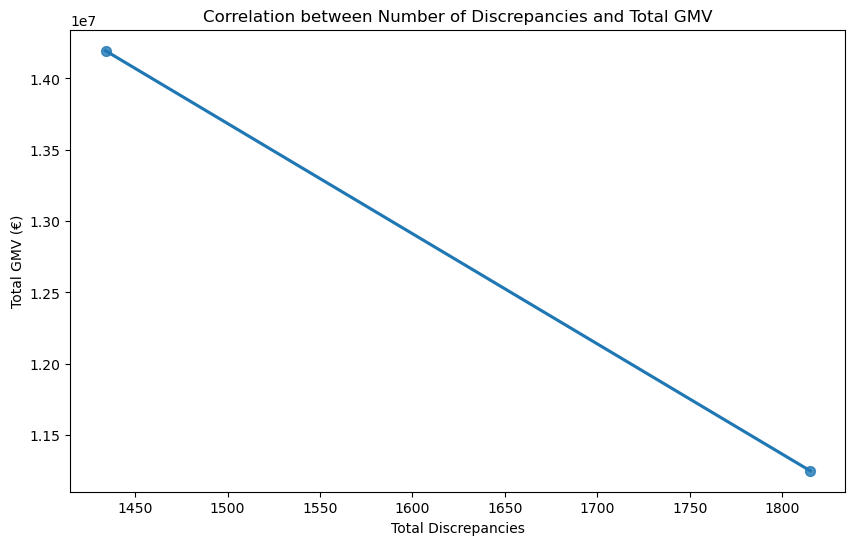

In [77]:
# Calculate and visualize correlation between discrepancies and GMV
# Create columns for discrepancies
df['Name Discrepancy'] = df['PIM Product Name'] != df['Catalog Product Name']
df['Image Discrepancy'] = df['PIM Image'] != df['Catalog Image']
# Count the number of discrepancies per partner
df['Total Discrepancies'] = df['Name Discrepancy'].astype(int) + df['Image Discrepancy'].astype(int)
# Aggregate data to calculate the number of discrepancies and total GMV per partner
aggregated_data = df.groupby('Partner Name').agg({
    'Total Discrepancies': 'sum',
    'GMV (€)': 'sum'
}).reset_index()
# Calculate correlation coefficient
correlation_coefficient = aggregated_data['Total Discrepancies'].corr(aggregated_data['GMV (€)'])
print(f"Correlation coefficient between number of discrepancies and total GMV: {correlation_coefficient:.2f}")
# Plot scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Discrepancies', y='GMV (€)', data=aggregated_data, ci=None, scatter_kws={"s": 50})
plt.xlabel('Total Discrepancies')
plt.ylabel('Total GMV (€)')
plt.title('Correlation between Number of Discrepancies and Total GMV')
plt.show()
